In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

from ipywidgets import widgets

import skimage
from skimage import io
from skimage.viewer import ImageViewer

In [39]:
img = io.imread(f'images/cat03.jpg')
img = skimage.transform.rescale(img, 0.3)
print(img.shape)
img[:2]

/home/rainsong/miniconda3/envs/cg/lib/python3.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/rainsong/miniconda3/envs/cg/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/rainsong/miniconda3/envs/cg/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(1019, 678, 3)


array([[[0.23649306, 0.21688522, 0.20119895],
        [0.22253698, 0.20686805, 0.18921232],
        [0.23113911, 0.21937441, 0.19976657],
        ...,
        [0.2909798 , 0.2792151 , 0.25176412],
        [0.31082046, 0.29710365, 0.26574845],
        [0.30512084, 0.28943457, 0.25414045]],

       [[0.2300644 , 0.21045656, 0.18692715],
        [0.2176239 , 0.20195498, 0.17645611],
        [0.22443239, 0.21266768, 0.1852167 ],
        ...,
        [0.28668146, 0.27491676, 0.24746578],
        [0.30693643, 0.29321962, 0.26186442],
        [0.30000514, 0.28431886, 0.24902474]]])

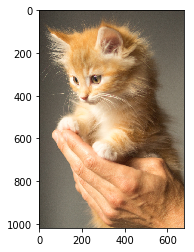

In [40]:
# viewer = ImageViewer(img)
# viewer.show()
plt.imshow(img)

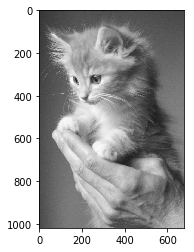

In [43]:
gray_image = img.copy()

y_, x_, _ = gray_image.shape
for x in range(x_):
    for y in range(y_):
        bgr = gray_image[y, x]
        gray = np.mean(bgr)
        gray_image[y, x] = (gray, gray, gray)
plt.imshow(gray_image)

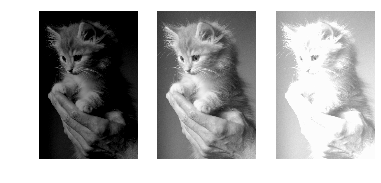

In [87]:
def shift_brightness(img, c):
    y_, x_, _ = img.shape
    for x in range(x_):
        for y in range(y_):
            img[y, x] += c
            if img[y, x][0] >= 1: img[y, x] = 0.99       
            if img[y, x][0] <= 0: img[y, x] = 0
    return img

def _apply(c):
    return shift_brightness(gray_image.copy(), c)

with multiprocessing.Pool(processes=5) as p:
    dark, bright = p.map(_apply, [-0.4, 0.4])

f, axarr = plt.subplots(1,3)
for ax in axarr: ax.axis('off')

axarr[0].imshow(dark)
axarr[1].imshow(gray_image)
axarr[2].imshow(bright)

In [98]:
gray_image.copy()


def handle(c):
    mut_img = shift_brightness(gray_image.copy(), c)
    fig, axarr = plt.subplots(1,2)
    for ax in axarr: ax.axis('off')
    axarr[0].imshow(gray_image)
    axarr[1].imshow(mut_img)
t = widgets.Text()
t.on_submit(handle)
t

Text(value='')

TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''